# Crop Yield Prediction Using Machine Learning Based on Weather and Soil Parameters

In [1]:
import numpy as np
import pandas as pd

In [6]:
# Loading Dataset
df = pd.read_csv('crop_yield_dataset.csv')
print(df.head())
print(df.info())

   Fertilizer  temp     N     P     K  yeild
0        80.0  28.0  80.0  24.0  20.0   12.0
1        77.0  27.0  78.0  23.0  20.0   12.0
2        80.0  26.0  80.0  24.0  20.0   12.0
3        80.0  28.0  80.0  24.0  20.0   12.0
4        78.0  27.0  78.0  23.0  19.0   12.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fertilizer  2596 non-null   float64
 1   temp        2596 non-null   float64
 2   N           2596 non-null   float64
 3   P           2596 non-null   float64
 4   K           2596 non-null   float64
 5   yeild       2596 non-null   float64
dtypes: float64(6)
memory usage: 121.8 KB
None


In [7]:
# Check for missing values
print(df.isnull().sum())

Fertilizer    0
temp          0
N             0
P             0
K             0
yeild         0
dtype: int64


In [8]:
# rename the column yeild to yield
df.rename(columns={"yeild": "yield"}, inplace=True)

In [9]:
print(df.head())

   Fertilizer  temp     N     P     K  yield
0        80.0  28.0  80.0  24.0  20.0   12.0
1        77.0  27.0  78.0  23.0  20.0   12.0
2        80.0  26.0  80.0  24.0  20.0   12.0
3        80.0  28.0  80.0  24.0  20.0   12.0
4        78.0  27.0  78.0  23.0  19.0   12.0


In [10]:
# Checking for duplicates
df.duplicated().head()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [11]:
# Count total duplicates
df.duplicated().sum()

np.int64(11)

In [13]:
# displays all duplicate rows
df[df.duplicated()]

,Fertilizer,temp,N,P,K,yield
3,80.0,28.0,80.0,24.0,20.0,12.0
5,80.0,28.0,80.0,24.0,20.0,12.0
205,65.0,38.0,60.0,20.0,16.0,8.0
406,76.0,26.0,75.0,24.0,19.0,11.0
599,50.0,37.0,65.0,18.0,19.0,9.0
600,50.0,37.0,65.0,18.0,19.0,9.0
801,73.0,29.0,73.0,23.0,20.0,10.0
802,70.0,24.0,70.0,22.0,18.0,10.0
809,77.0,28.0,76.0,22.0,19.0,10.0
1001,55.0,38.0,65.0,19.0,17.0,7.0


In [18]:
# remove duplicates
df.drop_duplicates(inplace=True)

##### Now duplicates has been removed, just im checking once again my duplicates data

In [16]:
df.duplicated().head()

0    False
1    False
2    False
4    False
6    False
dtype: bool

In [17]:
# displays all duplicate rows
df[df.duplicated()]

,Fertilizer,temp,N,P,K,yield


##### No duplicate data in my dataset now

## Check for Outliers

In [21]:
import matplotlib.pyplot as plt

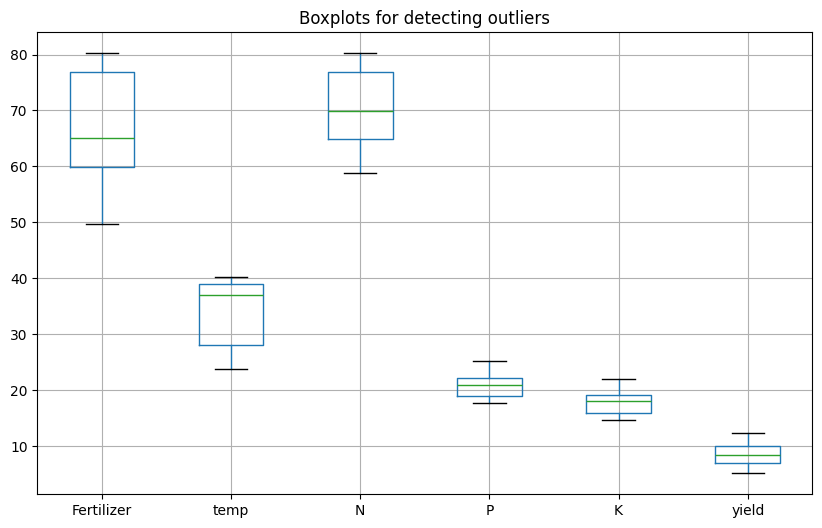

In [23]:
# plot boxplot for each numeric column
df[['Fertilizer', 'temp', 'N', 'P', 'K', 'yield']].boxplot(figsize=(10,6))
plt.title("Boxplots for detecting outliers")
plt.show()

In [26]:
# calculate z-scores
z = (df - df.mean()) / df.std()
# identify rows with outliers
outliers = df[(np.abs(z) > 3).any(axis=1)]
print(outliers)

Empty DataFrame
Columns: [Fertilizer, temp, N, P, K, yield]
Index: []


##### There is no outliers in my dataset

## Feature Scaling